### Imports

In [25]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv("data\products.csv",sep='	')
data.head()

C:\Users\blanc\AppData\Local\Temp\ipykernel_15304\364748533.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("data\products.csv",sep='	')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data['countries_fr']

0             France
1         États-Unis
2         États-Unis
3         États-Unis
4         États-Unis
             ...    
320767      Roumanie
320768    États-Unis
320769         Chine
320770        France
320771    États-Unis
Name: countries_fr, Length: 320772, dtype: object

In [28]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

### Complétude des données

In [29]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

<Axes: >

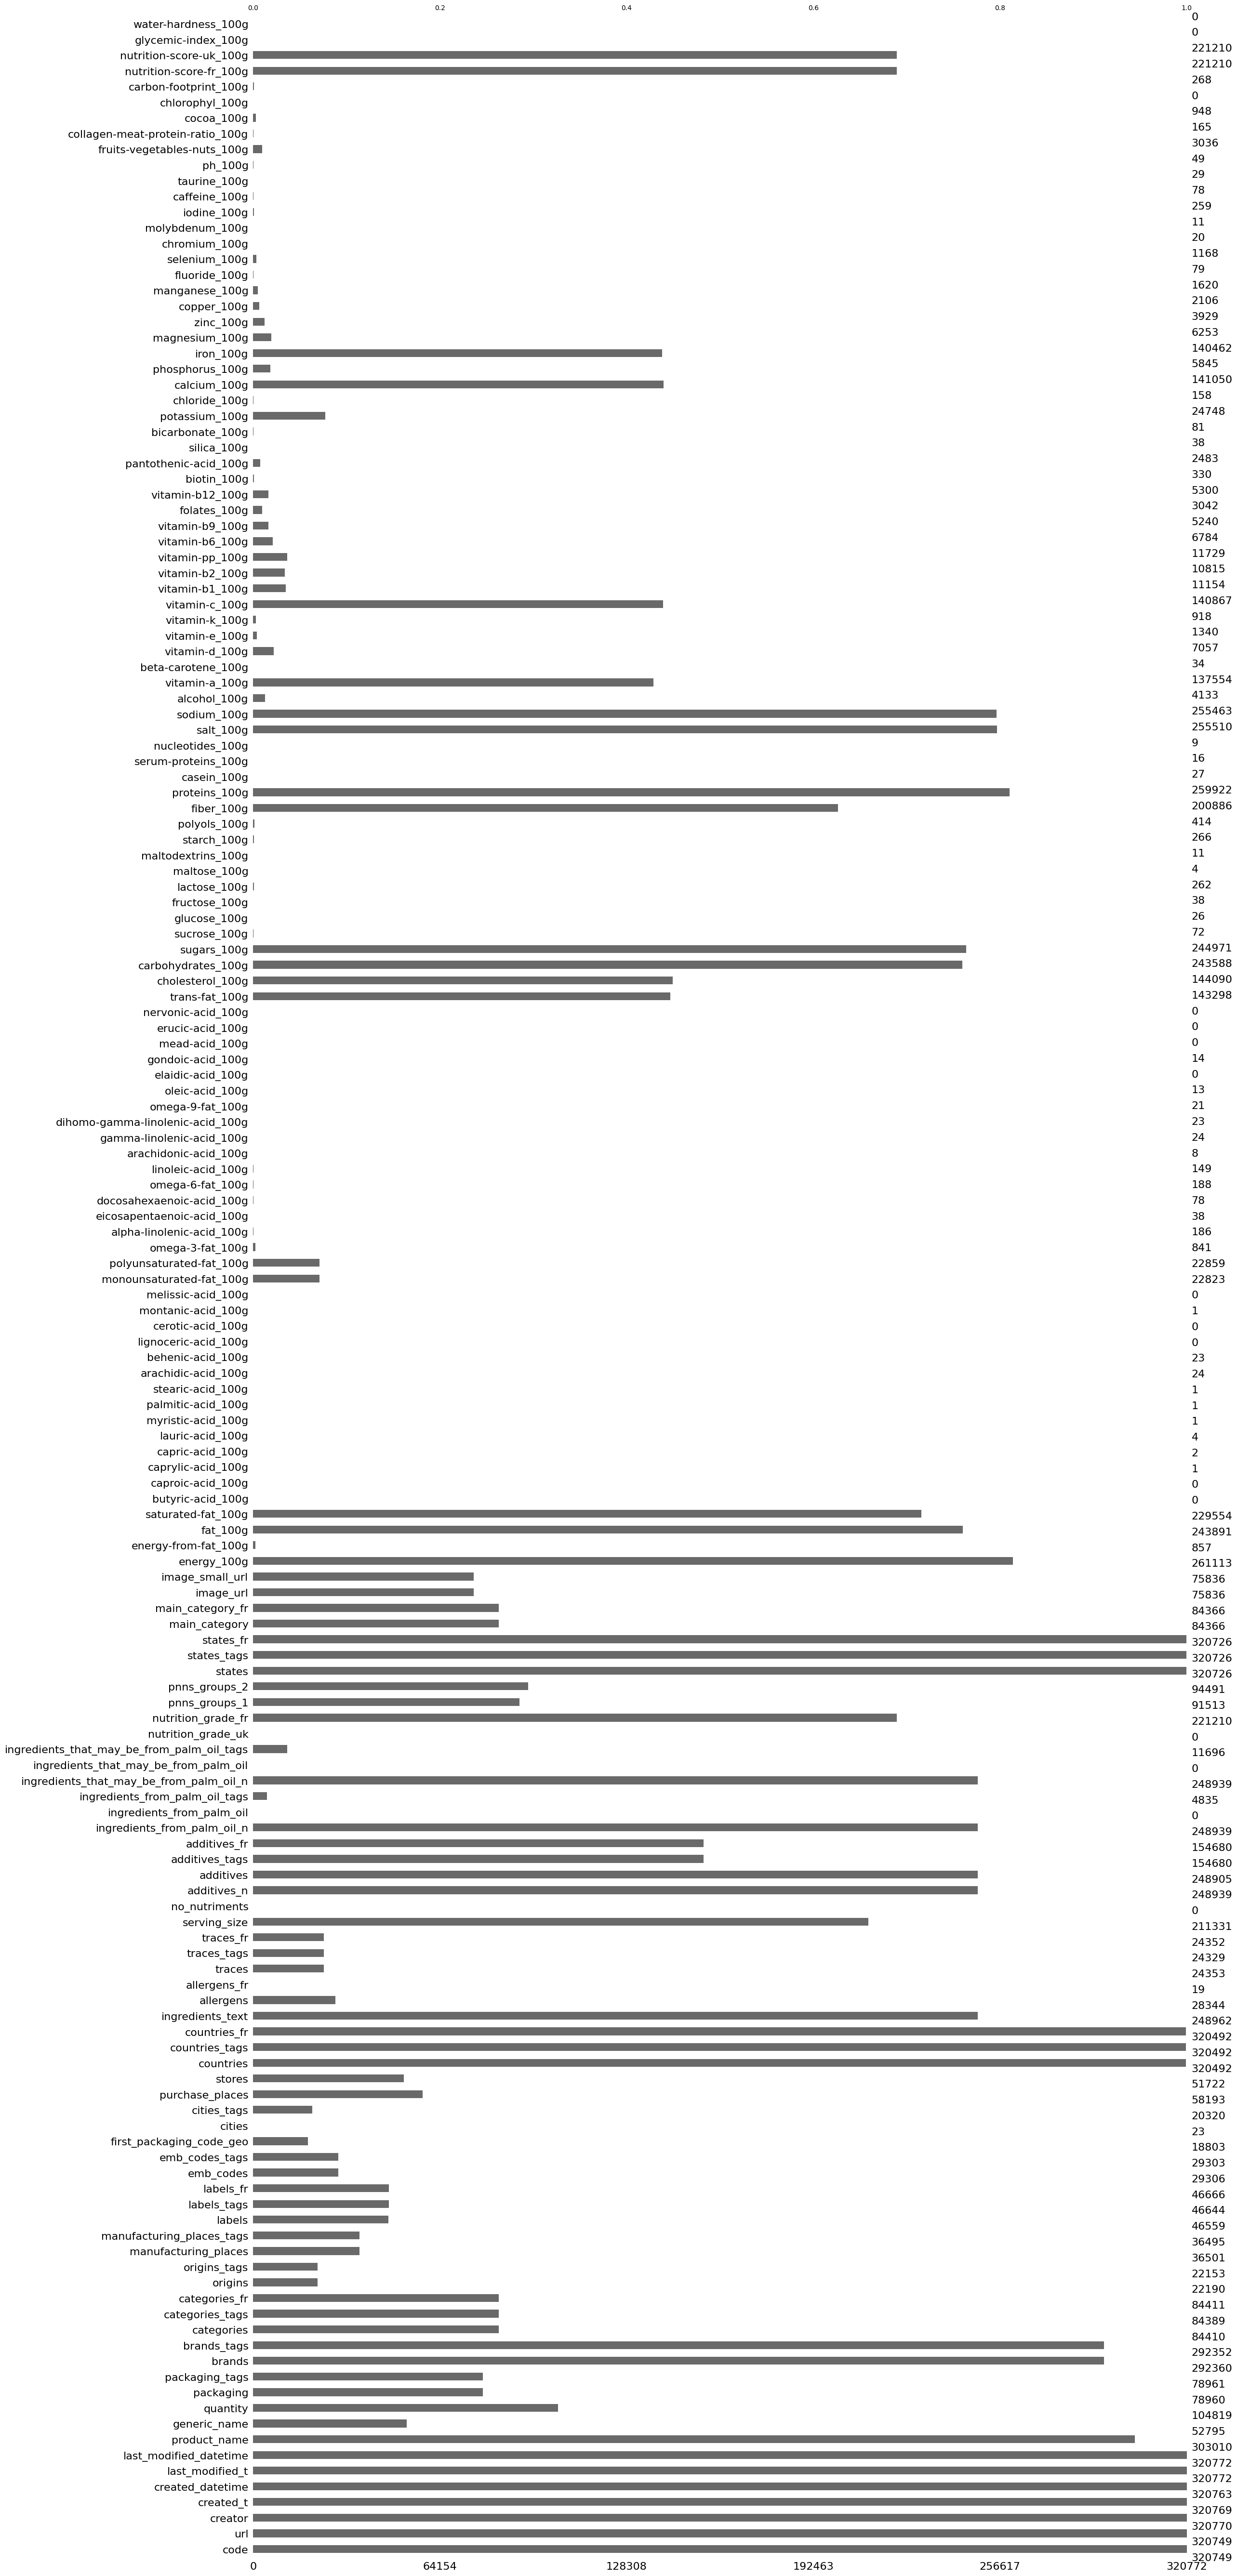

In [30]:
msno.bar(data)

In [31]:
#Vérification des lignes dupliquées par code
data[(data.duplicated(subset='code',keep=False))&(~data['code'].isna())].sort_values(by='code')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
9892,11778,http://world-fr.openfoodfacts.org/produit/0011...,beniben,1474489149,2016-09-21T20:19:09Z,1491142385,2017-04-02T14:13:05Z,All Butter Reduced Fat Stem Ginger Cookies,NaN,225 g,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
458,11778,http://world-fr.openfoodfacts.org/produit/0001...,gildubs,1490975915,2017-03-31T15:58:35Z,1490976772,2017-03-31T16:12:52Z,Stem Ginger Cookies,cookies au beurre à teneur réduite en matières...,225 g (10 cookies),...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,16117,http://world-fr.openfoodfacts.org/produit/0001...,usda-ndb-import,1489065258,2017-03-09T13:14:18Z,1489065258,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,24600,http://world-fr.openfoodfacts.org/produit/0002...,tacinte,1435406581,2015-06-27T12:03:01Z,1435406592,2015-06-27T12:03:12Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105704,876045004026,http://world-fr.openfoodfacts.org/produit/0087...,usda-ndb-import,1489062109,2017-03-09T12:21:49Z,1489062109,2017-03-09T12:21:49Z,"Guy Fieri, Barbeque Sauce",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
115938,4711567123489,http://world-fr.openfoodfacts.org/produit/0471...,usda-ndb-import,1489142865,2017-03-10T10:47:45Z,1489142865,2017-03-10T10:47:45Z,"Dainty Food Co, Chili Sauce With Black Bean",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
268065,4711567123489,http://world-fr.openfoodfacts.org/produit/4711...,usda-ndb-import,1489097363,2017-03-09T22:09:23Z,1489097363,2017-03-09T22:09:23Z,Chile Sauce With Black Bean,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
276819,5400141350470,http://world-fr.openfoodfacts.org/produit/5400...,gauthier-de-geest,1481365048,2016-12-10T10:17:28Z,1485724198,2017-01-29T21:09:58Z,Cribbits Rice & Wheat Flakes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [32]:
#pnns_groups_1 contient les catégories les plus proches de la séparation général/fromages/boissons du calcul du nutriscore
data['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [33]:
data['countries_fr']

0             France
1         États-Unis
2         États-Unis
3         États-Unis
4         États-Unis
             ...    
320767      Roumanie
320768    États-Unis
320769         Chine
320770        France
320771    États-Unis
Name: countries_fr, Length: 320772, dtype: object

In [34]:
def filter_df(df):
    print('Filtering dataset for France and selecting columns')
    print('Initial row & columns :',df.shape)
    filter_by_country=[('France' in str(countries)) for countries in df['countries_fr']]
    wanted_cat_columns=['code','countries_fr','last_modified_datetime','product_name','pnns_groups_1']
    filter_num=['_100g' in str(col) for col in df.columns]
    data=pd.concat([df.loc[filter_by_country,wanted_cat_columns],df.loc[filter_by_country,filter_num]],axis=1)
    print('Resulting rows and columns',data.shape)
    print('Result : ')
    print(data.info(verbose=True,show_counts=True))
    return data

In [35]:
filtered_df=filter_df(data)


Filtering dataset for France and selecting columns
Initial row & columns : (320772, 162)
Resulting rows and columns (98440, 104)
Result : 
<class 'pandas.core.frame.DataFrame'>
Index: 98440 entries, 0 to 320770
Data columns (total 104 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    code                              98440 non-null  object 
 1    countries_fr                      98440 non-null  object 
 2    last_modified_datetime            98440 non-null  object 
 3    product_name                      91247 non-null  object 
 4    pnns_groups_1                     64881 non-null  object 
 5    energy_100g                       64593 non-null  float64
 6    energy-from-fat_100g              30 non-null     float64
 7    fat_100g                          47642 non-null  float64
 8    saturated-fat_100g                62375 non-null  float64
 9    butyric-acid_100g                 0 non-null 

In [36]:
def drop_empty (df) :
    print('Dropping rows without product name, duplicated rows and empty columns (>25% nans)')
    print('Initial row & columns :',df.shape)
    df.dropna(subset='product_name',inplace=True)
    df.drop_duplicates(subset='code',keep='last',inplace=True)
    df.dropna(axis=1,thresh=df.shape[0]/4,inplace=True)
    df.dropna(subset=df.select_dtypes('number').columns,how='all',inplace=True)
    print('Resulting rows and columns',df.shape)
    nutri_cols=['pnns_groups_1','energy_100g','fat_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g','sodium_100g','fruits-vegetables-nuts_100g']
    for col in nutri_cols:
        if col not in df.columns:
            print('Check nutri-score indicators : Too many missing values for column ',col,'. Column will be dropped')
    msno.bar(df)
    plt.show()
    return df


Dropping rows without product name, duplicated rows and empty columns (>25% nans)
Initial row & columns : (98440, 104)


Resulting rows and columns (64925, 16)
Check nutri-score indicators : Too many missing values for column  fruits-vegetables-nuts_100g . Column will be dropped


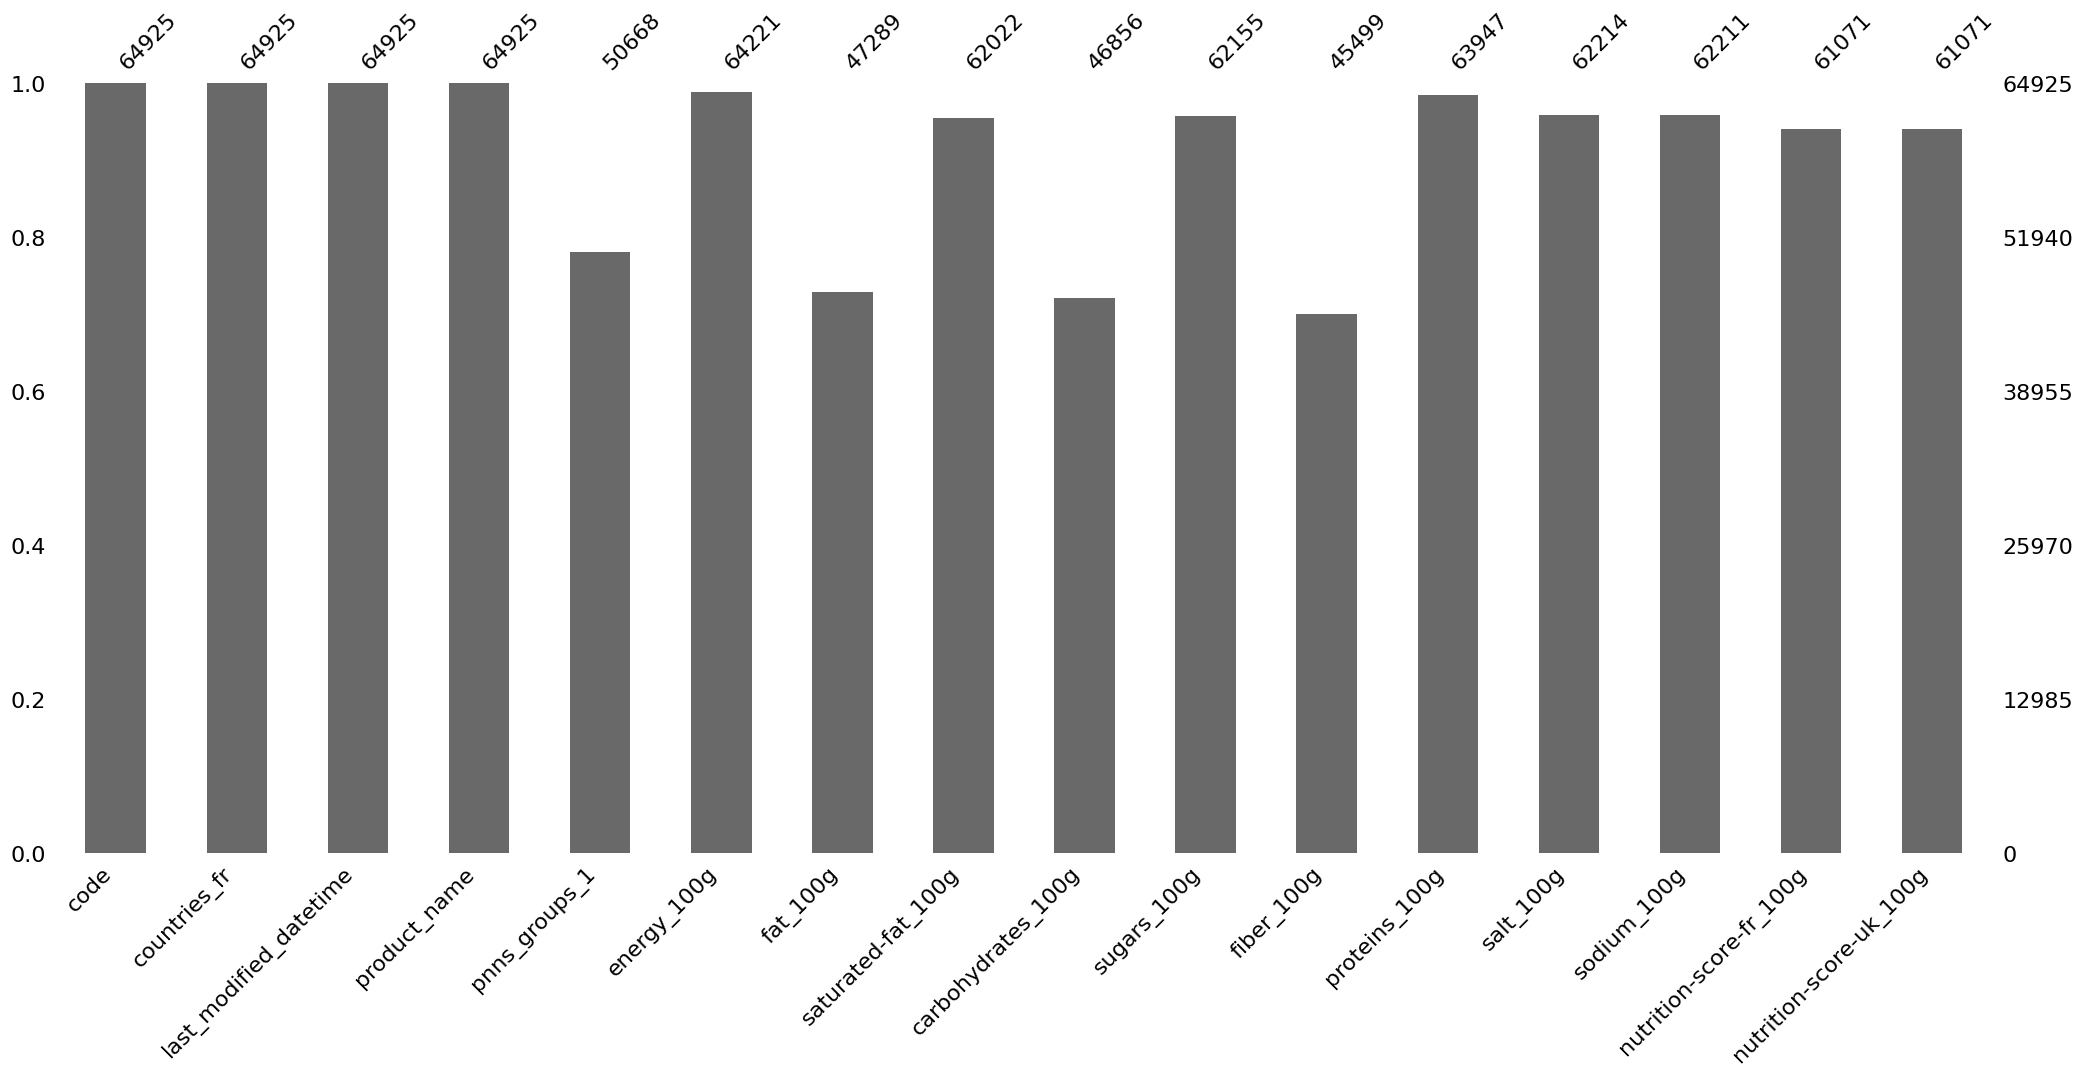

In [37]:
filtered_df=drop_empty(filtered_df)

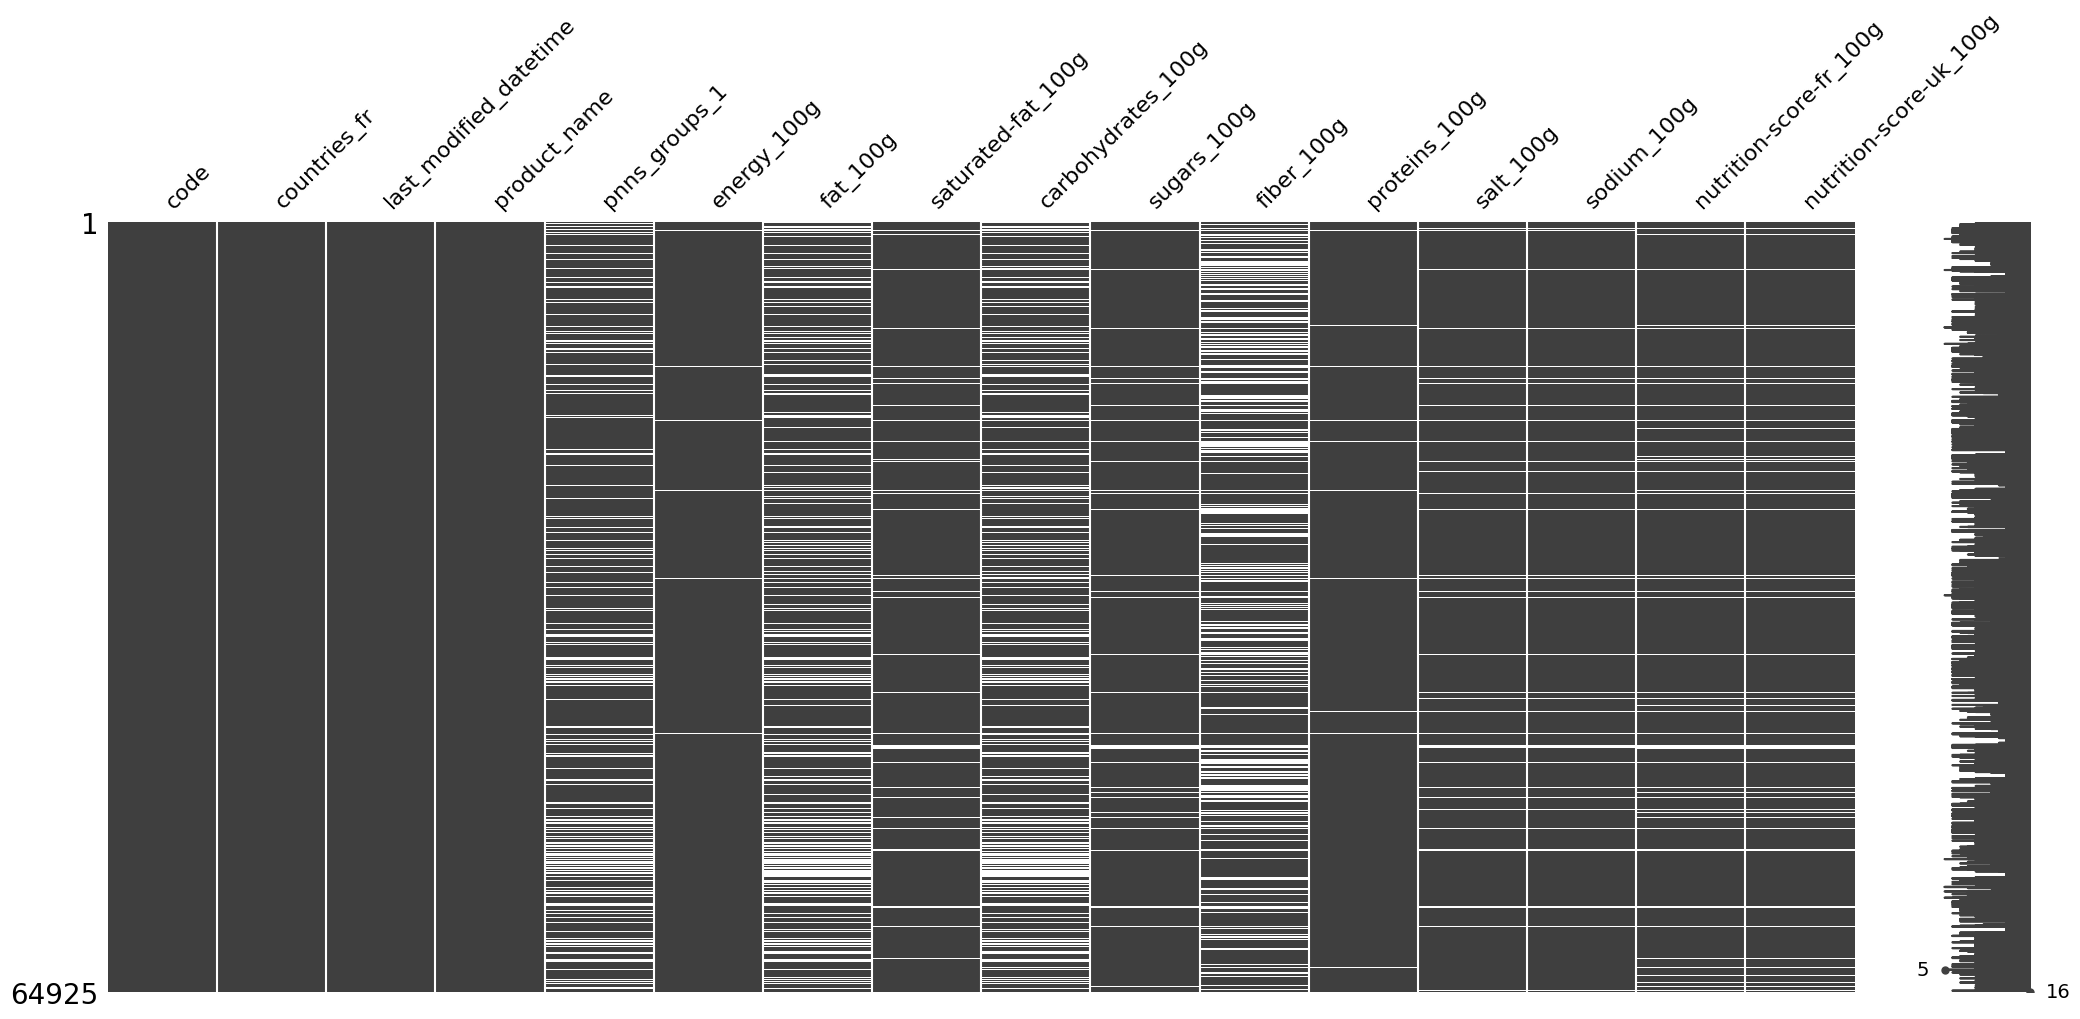

In [38]:
msno.matrix(filtered_df)
plt.show()

Les variables nécessaires au calcul du nutriscore sont : 
- type de produit : général,fromage,matières grasses ajoutées ou boisson (déductible de pnns_groups_1) 
- valeur énérgétique (energy_100g)
- matières grasses (fat_100g)
- Acides gras saturés (saturated-fat_100g)
- Sucres (sugars_100g) : Rq - Les sucres sont un type de carbohydrate
- Protéines (proteins_100g)
- Fibres (fiber_100g)
- Sel ou Sodium (salt_100g ou sodium_100g) : Rq - une formule de conversion sel vers sodium est proposée dans le calcul du nutriscore à [sodium]=[sel]*1000/2.5

On retrouve l'ensemble de ces valeurs dans le dataset filtré.

- Pourcentage de fruits, légumes, légumineuses, fruits à coque, huiles de colza, de noix et d'olive (%)
Cet indicateur n'a pratiquement pas de données renseignées, il a donc été écarté.




In [39]:
filtered_df.duplicated().any()

False

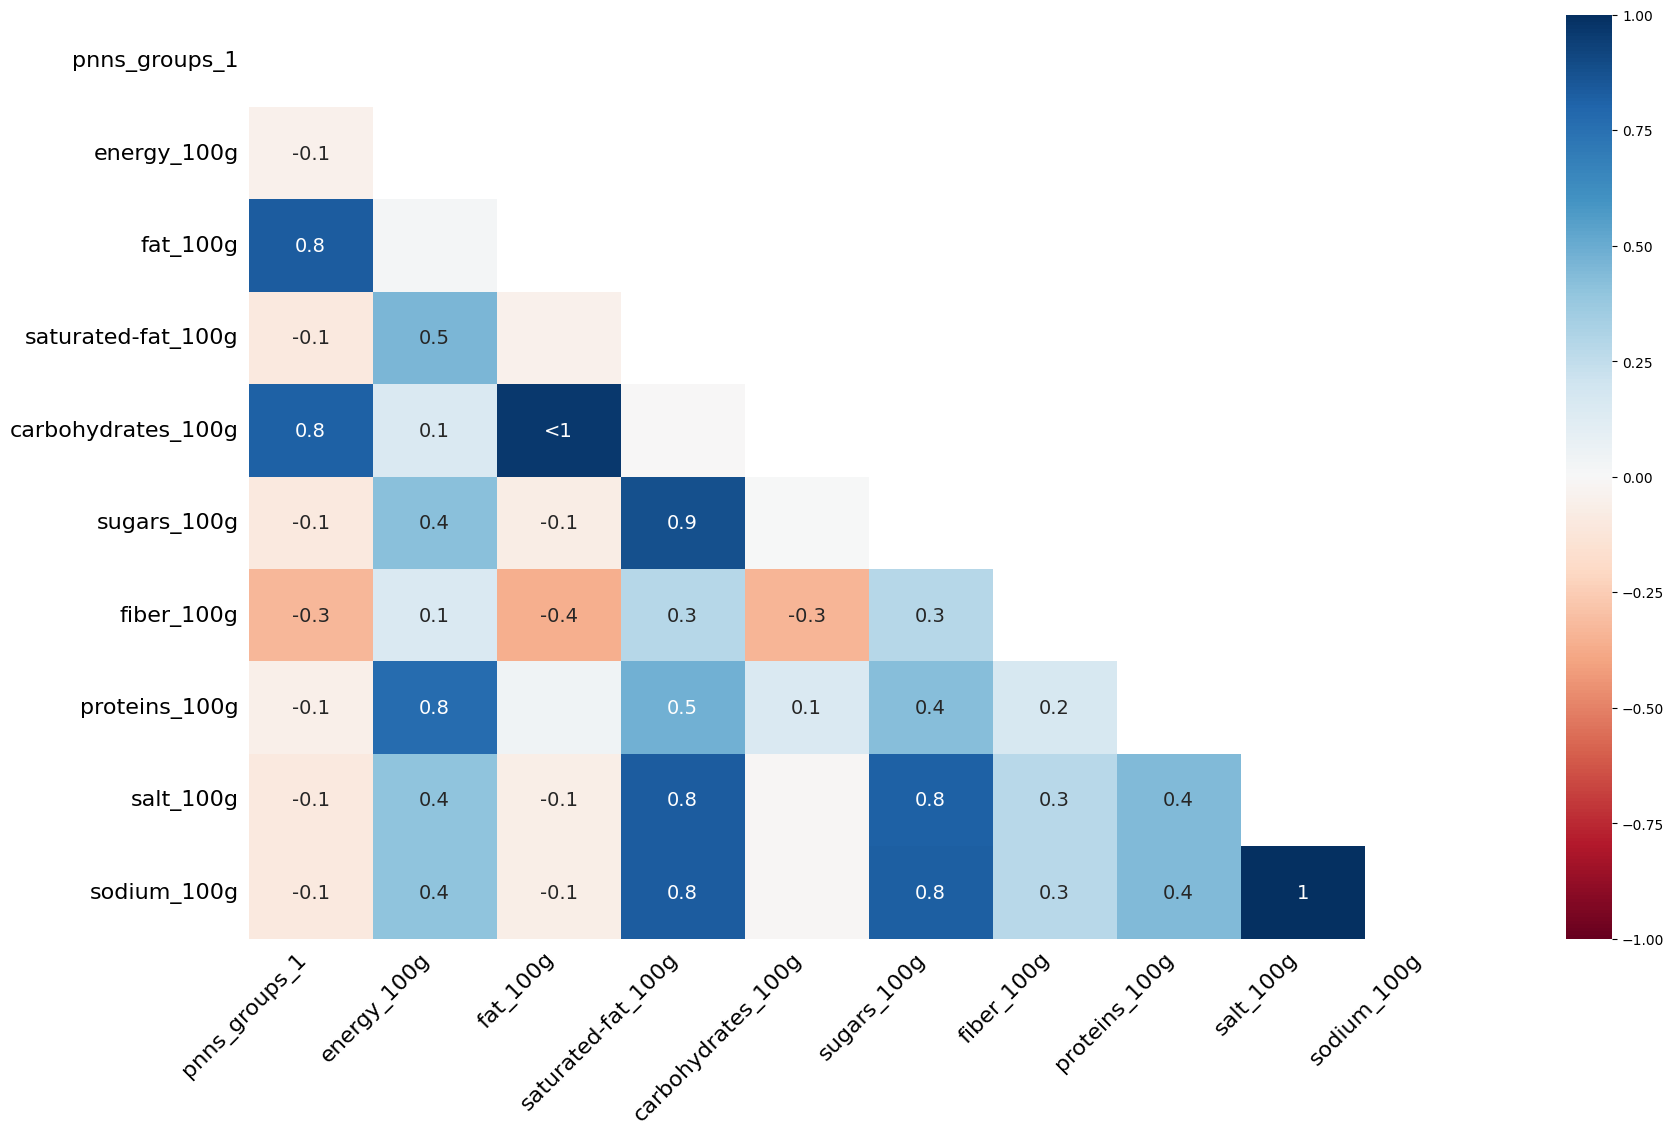

In [40]:
msno.heatmap(filtered_df.iloc[:,:-2])
plt.show()

### Valeurs abhérentes

#### Colonnes numériques

##### Filtre par intervalles de valeurs acceptables

In [41]:
filtered_df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,6.422100e+04,47289.000000,62022.000000,46856.000000,62155.000000,45499.000000,63947.000000,62214.000000,62211.000000,61071.000000,61071.000000
mean,1.170729e+03,13.330032,5.425161,27.741065,13.424239,2.559571,7.763867,1.160096,0.456751,8.678391,8.357879
std,1.287007e+04,16.930716,8.539620,27.416661,19.081956,4.642411,7.893478,4.303745,1.694369,9.044401,9.383223
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,4.270000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1.035000e+03,6.800000,2.000000,14.500000,4.100000,1.300000,6.000000,0.558800,0.220000,9.000000,7.000000
75%,1.649000e+03,21.000000,7.400000,53.000000,17.790000,3.200000,11.000000,1.244600,0.490000,15.000000,16.000000
max,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000,36.000000


La valeur d'énergie peut aller jusqu'à 900kcal soit 3780 KJ , la valeur de sodium en mg/100g, l'échelle de nutritrion score va de -15 à 40 et les autres valeurs sont en g/100g, ce qui nous donne les limites suivantes :

In [42]:
def drop_outofbounds(df):
    print('Verification des dépassements des limites de concentration pour 100g')
    #Vérification sodium
    filtre=(df['sodium_100g']>100000)|(df['sodium_100g']<0)
    if (filtre).any():
        print('Sodium : Valeurs hors limites : ',filtre.sum(),' lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification nutriscores
    filtre_bas_nutriscore=df['nutrition-score-fr_100g']<-15
    filtre_haut_nutriscore=df['nutrition-score-fr_100g']>40
    filtre=filtre_bas_nutriscore|filtre_haut_nutriscore
    if (filtre).any():
        print('Nutriscore fr : Valeurs hors limites :',(filtre).sum(),'lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)
    filtre_bas_nutriscore=df['nutrition-score-uk_100g']<-15
    filtre_haut_nutriscore=df['nutrition-score-uk_100g']>40
    filtre=filtre_bas_nutriscore|filtre_haut_nutriscore
    if (filtre).any():
        print('Nutriscore uk : Valeurs hors limites :',(filtre).sum(),'lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification calories
    filtre=(df['energy_100g']>3780)|(df['energy_100g']<0)
    if (filtre).any():
        print('Calories : Valeurs hors limites : ',(filtre).sum(),' lignes supprimées')
        display(df[filtre])
        df.drop(df[filtre].index,inplace=True)

    #Vérification des autres colonnes
    col_list=[col for col in df.columns if ('_100g' in str(col))&(col not in ['sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','energy_100g'])]

    for col in col_list:
        filtre=df[col]>100
        if (filtre).any():
            print(col,': Valeurs hors limites : ',(filtre).sum(),' lignes supprimées')
            display(df [filtre])
            df.drop(df[filtre].index,inplace=True)
    return (df)

In [43]:
#Tests pour la fonction drop_outofbounds
df_temp=filtered_df.copy()
df_temp.loc[0,'energy_100g']=-30
df_temp.loc[1,'energy_100g']=500000
df_temp.loc[3,'sodium_100g']=-30
df_temp.loc[4,'sodium_100g']=500000
df_temp.loc[5,'nutrition-score-uk_100g']=-30
df_temp.loc[6,'nutrition-score-fr_100g']=50


In [44]:
drop_outofbounds(df_temp)

Verification des dépassements des limites de concentration pour 100g
Sodium : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN


Nutriscore fr : Valeurs hors limites : 1 lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN


Nutriscore uk : Valeurs hors limites : 1 lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0


Calories : Valeurs hors limites :  92  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,43647390011,France,2017-03-10T20:31:25Z,Tawny' Orange,NaN,5054.0,NaN,0.0,NaN,65.0,0.0,0.0,0.00,0.000000,20.0,20.0
161426,853807005163,France,2017-03-02T13:39:19Z,Huile d'avocat,NaN,3883.0,NaN,15.0,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0
178567,20193447,France,2017-04-08T18:48:53Z,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,4197.0,NaN,3.9,NaN,18.5,0.0,2.9,0.11,0.043307,17.0,17.0
178787,20233679,France,2017-04-20T07:42:28Z,Halva with Almonds,Sugary snacks,9983.0,36.8,7.8,44.2,32.0,NaN,12.9,0.00,0.000000,24.0,24.0
179179,2030502431284,France,2017-02-19T13:55:36Z,Lot De 4 Baguettes,NaN,4184.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00,0.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313852,8711200595631,France,2017-04-20T17:51:02Z,Cornetto Mini X8 Fruit,NaN,5644.0,NaN,13.0,NaN,24.0,0.0,3.7,0.12,0.047244,25.0,25.0
319695,9310804500189,France,2017-03-15T10:39:08Z,Miel,NaN,5925.0,NaN,0.0,NaN,82.0,0.0,0.0,0.00,0.000000,20.0,20.0
320561,9556001171337,France,2017-04-06T05:05:27Z,Chicken Cup Of Noodles,NaN,4602.0,NaN,4.7,NaN,4.0,0.0,9.7,0.00,0.000000,14.0,14.0
0,NaN,NaN,NaN,NaN,NaN,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fat_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
305054,8032942610032,France,2017-03-17T14:09:22Z,Graine de couscous moyen,Cereals and potatoes,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0,-1.0


carbohydrates_100g : Valeurs hors limites :  5  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
155609,838619000254,France,2017-02-14T14:27:14Z,Beurre d'érable,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
202571,3229820787909,France,2015-04-07T17:17:55Z,Sirop d'Agave brun bio,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0,15.0
239347,3560070740338,France,2017-03-10T11:23:31Z,Sirop d'agave,Sugary snacks,1785.0,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
260599,4016249015732,France,2016-11-26T09:38:10Z,Sirop d agave pur,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0,15.0
317635,8935000901649,France,2017-03-08T21:19:58Z,Banane sèche,Fruits and vegetables,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00,0.00000,4.0,4.0


fiber_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
298897,7622210988768,France,2017-04-16T19:38:10Z,Milka Schmunzelhase Alpenmilch 175G,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0,22.0


salt_100g : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232239,3423720002432,France,2017-02-01T21:21:33Z,Keeny Bio,Sugary snacks,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0,22.0
233372,3445850070259,France,2017-03-03T14:08:14Z,Sel de Guérande Label Rouge,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0,10.0


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,"France,États-Unis",2017-03-09T10:34:27Z,Lion Peanut x2,unknown,1883.0,20.00,12.50,70.00,57.50,2.5,2.50,0.09652,0.038000,22.0,22.0
138,39529,"France,États-Unis",2017-03-09T10:34:12Z,Pack de 2 Twix,unknown,1481.0,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN
190,10187319,France,2017-02-17T10:05:54Z,Mini Confettis,NaN,1753.0,NaN,0.80,NaN,87.70,0.9,0.60,0.01000,0.003937,14.0,14.0
191,10207260,France,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.00300,0.001181,14.0,14.0
226,40608754,France,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Beverages,177.0,0.00,0.00,10.40,10.40,0.0,0.00,0.02540,0.010000,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,France,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0,16.0
320741,9782401029101,France,2017-04-06T19:47:01Z,Fiche Brevet,NaN,4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.00000,3.937008,0.0,0.0
320751,9847548283004,France,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Cereals and potatoes,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
320757,9900000000233,France,2017-04-01T20:52:19Z,Amandes,NaN,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0,0.0


In [45]:
filtered_df=drop_outofbounds(filtered_df)

Verification des dépassements des limites de concentration pour 100g
Calories : Valeurs hors limites :  90  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,43647390011,France,2017-03-10T20:31:25Z,Tawny' Orange,NaN,5054.0,NaN,0.00,NaN,65.0,0.0,0.0,0.00,0.000000,20.0,20.0
161426,853807005163,France,2017-03-02T13:39:19Z,Huile d'avocat,NaN,3883.0,NaN,15.00,NaN,0.0,0.0,0.0,0.00,0.000000,20.0,20.0
178567,20193447,France,2017-04-08T18:48:53Z,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,4197.0,NaN,3.90,NaN,18.5,0.0,2.9,0.11,0.043307,17.0,17.0
178787,20233679,France,2017-04-20T07:42:28Z,Halva with Almonds,Sugary snacks,9983.0,36.8,7.80,44.2,32.0,NaN,12.9,0.00,0.000000,24.0,24.0
179179,2030502431284,France,2017-02-19T13:55:36Z,Lot De 4 Baguettes,NaN,4184.0,NaN,0.00,NaN,0.0,0.0,0.0,0.00,0.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304297,8016857024016,France,2017-02-23T11:28:53Z,Gnocchi E Pasta Fresca,NaN,4828.0,NaN,3.52,NaN,1.9,2.3,9.8,1.12,0.440945,14.0,14.0
305223,8034063244592,France,2017-02-25T14:49:11Z,Miel D'eucalyptus,NaN,5749.0,NaN,0.00,NaN,80.0,0.0,0.4,0.01,0.003937,20.0,20.0
313852,8711200595631,France,2017-04-20T17:51:02Z,Cornetto Mini X8 Fruit,NaN,5644.0,NaN,13.00,NaN,24.0,0.0,3.7,0.12,0.047244,25.0,25.0
319695,9310804500189,France,2017-03-15T10:39:08Z,Miel,NaN,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.00,0.000000,20.0,20.0


fat_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
305054,8032942610032,France,2017-03-17T14:09:22Z,Graine de couscous moyen,Cereals and potatoes,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0,-1.0


carbohydrates_100g : Valeurs hors limites :  5  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
155609,838619000254,France,2017-02-14T14:27:14Z,Beurre d'érable,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
202571,3229820787909,France,2015-04-07T17:17:55Z,Sirop d'Agave brun bio,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0,15.0
239347,3560070740338,France,2017-03-10T11:23:31Z,Sirop d'agave,Sugary snacks,1785.0,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
260599,4016249015732,France,2016-11-26T09:38:10Z,Sirop d agave pur,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0,15.0
317635,8935000901649,France,2017-03-08T21:19:58Z,Banane sèche,Fruits and vegetables,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00,0.00000,4.0,4.0


fiber_100g : Valeurs hors limites :  1  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
298897,7622210988768,France,2017-04-16T19:38:10Z,Milka Schmunzelhase Alpenmilch 175G,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0,22.0


salt_100g : Valeurs hors limites :  2  lignes supprimées


,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232239,3423720002432,France,2017-02-01T21:21:33Z,Keeny Bio,Sugary snacks,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0,22.0
233372,3445850070259,France,2017-03-03T14:08:14Z,Sel de Guérande Label Rouge,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0,10.0


In [46]:
filtered_df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,64122.000000,47264.000000,61924.000000,46830.000000,62056.000000,45408.000000,63849.000000,62117.000000,62114.000000,60975.000000,60975.000000
mean,1111.332278,13.318094,5.420944,27.721505,13.405679,2.553847,7.762888,1.153859,0.454296,8.663272,8.341894
std,773.091418,16.837668,8.496457,27.386679,19.053902,4.550729,7.891619,4.191805,1.650353,9.039020,9.377687
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,427.000000,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1033.000000,6.800000,2.000000,14.500000,4.045000,1.330000,6.000000,0.558800,0.220000,9.000000,7.000000
75%,1646.750000,21.000000,7.400000,53.000000,17.700000,3.200000,11.000000,1.244600,0.490000,15.000000,16.000000
max,3774.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,40.000000,36.000000


##### Vérification de la cohérence entre variables

In [54]:
filtered_df[((filtered_df['salt_100g']*1000/2.5).round(0)-(filtered_df['sodium_100g']))>0.1]

,code,countries_fr,last_modified_datetime,product_name,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,"France,États-Unis",2017-03-09T10:34:27Z,Lion Peanut x2,unknown,1883.0,20.0,12.50,70.0,57.50,2.5,2.50,0.09652,0.038000,22.0,22.0
190,10187319,France,2017-02-17T10:05:54Z,Mini Confettis,NaN,1753.0,NaN,0.80,NaN,87.70,0.9,0.60,0.01000,0.003937,14.0,14.0
191,10207260,France,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.00300,0.001181,14.0,14.0
226,40608754,France,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Beverages,177.0,0.0,0.00,10.4,10.40,0.0,0.00,0.02540,0.010000,13.0,2.0
234,69161025,France,2017-03-22T19:59:36Z,Tarte Poireaux Et Lardons,NaN,1079.0,NaN,11.00,NaN,1.00,1.4,7.50,0.80000,0.314961,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,France,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0,16.0
320741,9782401029101,France,2017-04-06T19:47:01Z,Fiche Brevet,NaN,4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.00000,3.937008,0.0,0.0
320751,9847548283004,France,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,Cereals and potatoes,1643.0,2.8,0.60,74.8,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
320757,9900000000233,France,2017-04-01T20:52:19Z,Amandes,NaN,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0,0.0


In [55]:
#Il a l'air de s'agir d'erreur d'unité pour le sodium, saisi en g ald mg

In [56]:
#TODO Vérifier carbohydrates vs sucre et saturated fat vs fat